## Topics covered:
### 1. Decision trees
### 2. Random forests
### 3. Boosting

<hr>

# Part 1: Decision trees

<hr>

## Dataset: <br>
![PalmerPenguins](images/palmerpenguins.png)

Artwork by @allison_horst

## About the data:
Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. Datasets contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.

![PalmerPenguins](images/penguins_images.png)

# Dataset Description:

1. species: penguin species (Chinstrap, Adélie, or Gentoo) 
2. culmen_length_mm: culmen length (mm) 
3. culmen_depth_mm: culmen depth (mm) 
4. flipper_length_mm: flipper length (mm) 
5. body_mass_g: body mass (g) 
6. island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) 
7. sex: penguin sex 


![Culmen](images/culmen_depth.png)

Data originally published in:

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081
<br>

Data citations:

Adélie penguins:

Palmer Station Antarctica LTER and K. Gorman, 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Adélie penguins (Pygoscelis adeliae) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/98b16d7d563f265cb52372c8ca99e60f (Accessed 2020-06-08).

<br>
Gentoo penguins:

Palmer Station Antarctica LTER and K. Gorman, 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Gentoo penguin (Pygoscelis papua) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/7fca67fb28d56ee2ffa3d9370ebda689 (Accessed 2020-06-08).

<br>
Chinstrap penguins:

Palmer Station Antarctica LTER and K. Gorman, 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Chinstrap penguin (Pygoscelis antarcticus) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 6. Environmental Data Initiative. https://doi.org/10.6073/pasta/c14dfcfada8ea13a17536e73eb6fbe9e (Accessed 2020-06-08).

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore")

from mlxtend.plotting import plot_decision_regions

from itertools import cycle
from math import log

In [2]:
penguin_data = pd.read_csv("https://www.dropbox.com/s/i7enaxx8yttjzht/penguins_size.csv?dl=1")

In [3]:
penguin_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
species = penguin_data["species"].unique()

In [6]:
print(species)

['Adelie' 'Chinstrap' 'Gentoo']


We can observe there are some null values in the dataset collected. So lets do some data cleaning! \
Instead of dropping the missing data, lets instead do imputation.

https://scikit-learn.org/stable/modules/impute.html#

### Imputation for completing missing values using k-Nearest Neighbors.

For imputing missing values in categorical variables, we have to encode the categorical values into numeric values as KNNImputer works only for numeric variables. 

We can perform this using a mapping of categories to numeric variables.

In [7]:
def label_encode_features(dataset):
    #Use LabelEncoder to encode the categorical columns
    #You should replace the corresponding columns in the dataframe and return the dataf

    #Enter your code 
    #---------------
    label_encoder = LabelEncoder()
    penguin_data['species'] = label_encoder.fit_transform(penguin_data['species'])
    penguin_data['island'] = label_encoder.fit_transform(penguin_data['island'])
    penguin_data['sex'] = label_encoder.fit_transform(penguin_data['sex'])
    #---------------
    return dataset

In [8]:
penguin_data = label_encode_features(penguin_data)

In [9]:
penguin_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,NaN,NaN,NaN,NaN,2
4,0,2,36.7,19.3,193.0,3450.0,0


### Note NaN values have also been encoded

In [10]:
penguin_data.loc[penguin_data["sex"] == 2,"sex"] = np.nan       #reverting back encoded nan values for imputation

In [11]:
penguin_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1.0
1,0,2,39.5,17.4,186.0,3800.0,0.0
2,0,2,40.3,18.0,195.0,3250.0,0.0
3,0,2,NaN,NaN,NaN,NaN,NaN
4,0,2,36.7,19.3,193.0,3450.0,0.0


In [12]:
def dataset_imputation_KNN(dataset, n_neighbors):
    #use KNNImputer to replace the missing values
    #Your code should return the dataframe after imputation

    #Enter your code here
    #--------------------
    columns=dataset.columns.values
    imputer = KNNImputer(n_neighbors=n_neighbors)
    dataset = imputer.fit_transform(dataset)
    dataset = pd.DataFrame(dataset, columns=columns)
    #--------------------
    return dataset

In [13]:
penguin_data_imp_KNN = dataset_imputation_KNN(penguin_data, n_neighbors = 4)

In [14]:
penguin_data_imp_KNN.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,39.100,18.700,181.00,3750.0,1.00
1,0.0,2.0,39.500,17.400,186.00,3800.0,0.00
2,0.0,2.0,40.300,18.000,195.00,3250.0,0.00
3,0.0,2.0,39.575,18.275,190.25,3925.0,0.25
4,0.0,2.0,36.700,19.300,193.00,3450.0,0.00


In [15]:
penguin_data_imp_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    float64
 1   island             344 non-null    float64
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    float64
dtypes: float64(7)
memory usage: 18.9 KB


### We can also perform univariate imputation using SimpleImputer
### Similar to pandas.DataFrame.fillna()

In [16]:
def dataset_simple_imputation(dataset, strategy):
    #use SimpleImputer to replace the missing values as per the strategy
    #Your code should return the dataframe after imputation

    #Enter your code here
    #--------------------
    columns=dataset.columns.values
    imputer = SimpleImputer(missing_values= np.nan , strategy= strategy)
    fitted_imputer = imputer.fit(dataset)
    dataset = fitted_imputer.transform(dataset)
    dataset = pd.DataFrame(dataset, columns = columns)
    #--------------------
    return dataset

In [17]:
penguin_data_imp_simple = dataset_simple_imputation(dataset = penguin_data, strategy="median")

In [18]:
penguin_data_imp_simple.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,39.10,18.7,181.0,3750.0,1.0
1,0.0,2.0,39.50,17.4,186.0,3800.0,0.0
2,0.0,2.0,40.30,18.0,195.0,3250.0,0.0
3,0.0,2.0,44.45,17.3,197.0,4050.0,1.0
4,0.0,2.0,36.70,19.3,193.0,3450.0,0.0


In [19]:
penguin_data_imp_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    float64
 1   island             344 non-null    float64
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    float64
dtypes: float64(7)
memory usage: 18.9 KB


## Lets split the data into testing and training set

In [20]:
train, test = train_test_split(penguin_data_imp_simple, test_size=0.2, random_state=42)

In [21]:
train.shape

(275, 7)

In [22]:
test.shape

(69, 7)

### Decision tree classifier: To predict the species of the penguin

Target: species \
Features: all other columns in the dataframe

In [23]:
features = ["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]
target = "species"

In [24]:
def fit_decision_tree_model_classifier(X_train, Y_train, **args):
    #Fit and return the decision tree model

    #Enter your code here
    #--------------------
    model = DecisionTreeClassifier(**args)
    model.fit(X_train,Y_train)
    #--------------------
    return model

In [25]:
model_DT_class = fit_decision_tree_model_classifier(train[features],train[target], random_state = 42)

# Feature Importances

In [26]:
def return_feature_imp(model, features):
    #return feature importance of the fitted model
    
    feature_imp = np.zeros_like(features)

    if model == None:
        print("Model not fitted yet")
        return feature_imp
    
    #Enter your code here
    #--------------------
    feature_imp = model.feature_importances_
    #--------------------
    return feature_imp

In [27]:
def plot_bar_graph(features, importance):
    plt.figure(figsize = (10,3))
    plt.bar(features , importance)
    plt.title("Feature importance")
    plt.tight_layout()
    return

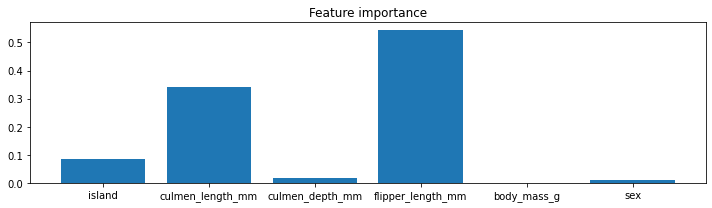

In [28]:
plot_bar_graph(features, return_feature_imp(model_DT_class, features))

# Permutation importances

In [29]:
def return_permutation_imp(model, features, target, train, n_repeats, random_state, n_jobs):
    #return feature importance of the fitted model
    
    permutation_imp = np.zeros_like(features)

    if model == None:
        print("Model not fitted yet")
        return permutation_imp

    #Enter your code here
    #--------------------
    permutation_imp = permutation_importance(model, train[features],train[target], n_repeats=n_repeats, random_state=random_state, n_jobs=n_jobs)
    #--------------------
    return permutation_imp['importances_mean']

In [30]:
importances = return_permutation_imp(model_DT_class, features, target, train, n_repeats = 10, random_state = 42, n_jobs = 2)

In [31]:
print(importances)

[0.31454545 0.196      0.06981818 0.33054545 0.         0.00763636]


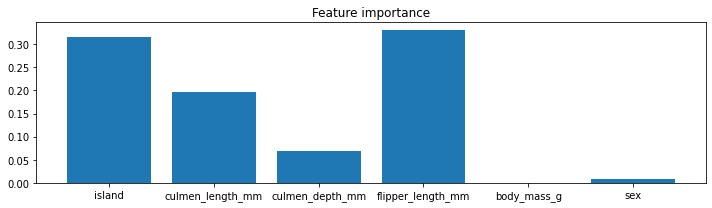

In [32]:
#Plotting the bar graph of feature importances

plot_bar_graph(features, importances)

In [33]:
def predictions(model,X_test):
    #Make predictions using the fitted model

    y_pred = np.zeros((len(X_test), 1))
    
    #Enter your code here
    #--------------------
    y_pred = model.predict(X_test)
    #--------------------
    return y_pred

In [34]:
y_pred = predictions(model_DT_class, test[features])

In [35]:
def return_class_metrics(y_pred, y):
    #return classification_report and confusion matrix

    report = []
    conf_matrix = []

    #Enter your code here
    #--------------------
    report = classification_report(y_pred, y)
    conf_matrix = confusion_matrix(y_pred, y)
    #--------------------
    return report, conf_matrix

In [36]:
report, conf_matrix = return_class_metrics(y_pred, test["species"])

In [37]:
print(report)

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        32
         1.0       1.00      1.00      1.00        16
         2.0       0.95      0.95      0.95        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [38]:
conf_matrix

array([[31,  0,  1],
       [ 0, 16,  0],
       [ 1,  0, 20]])

## Visualizing the decision tree

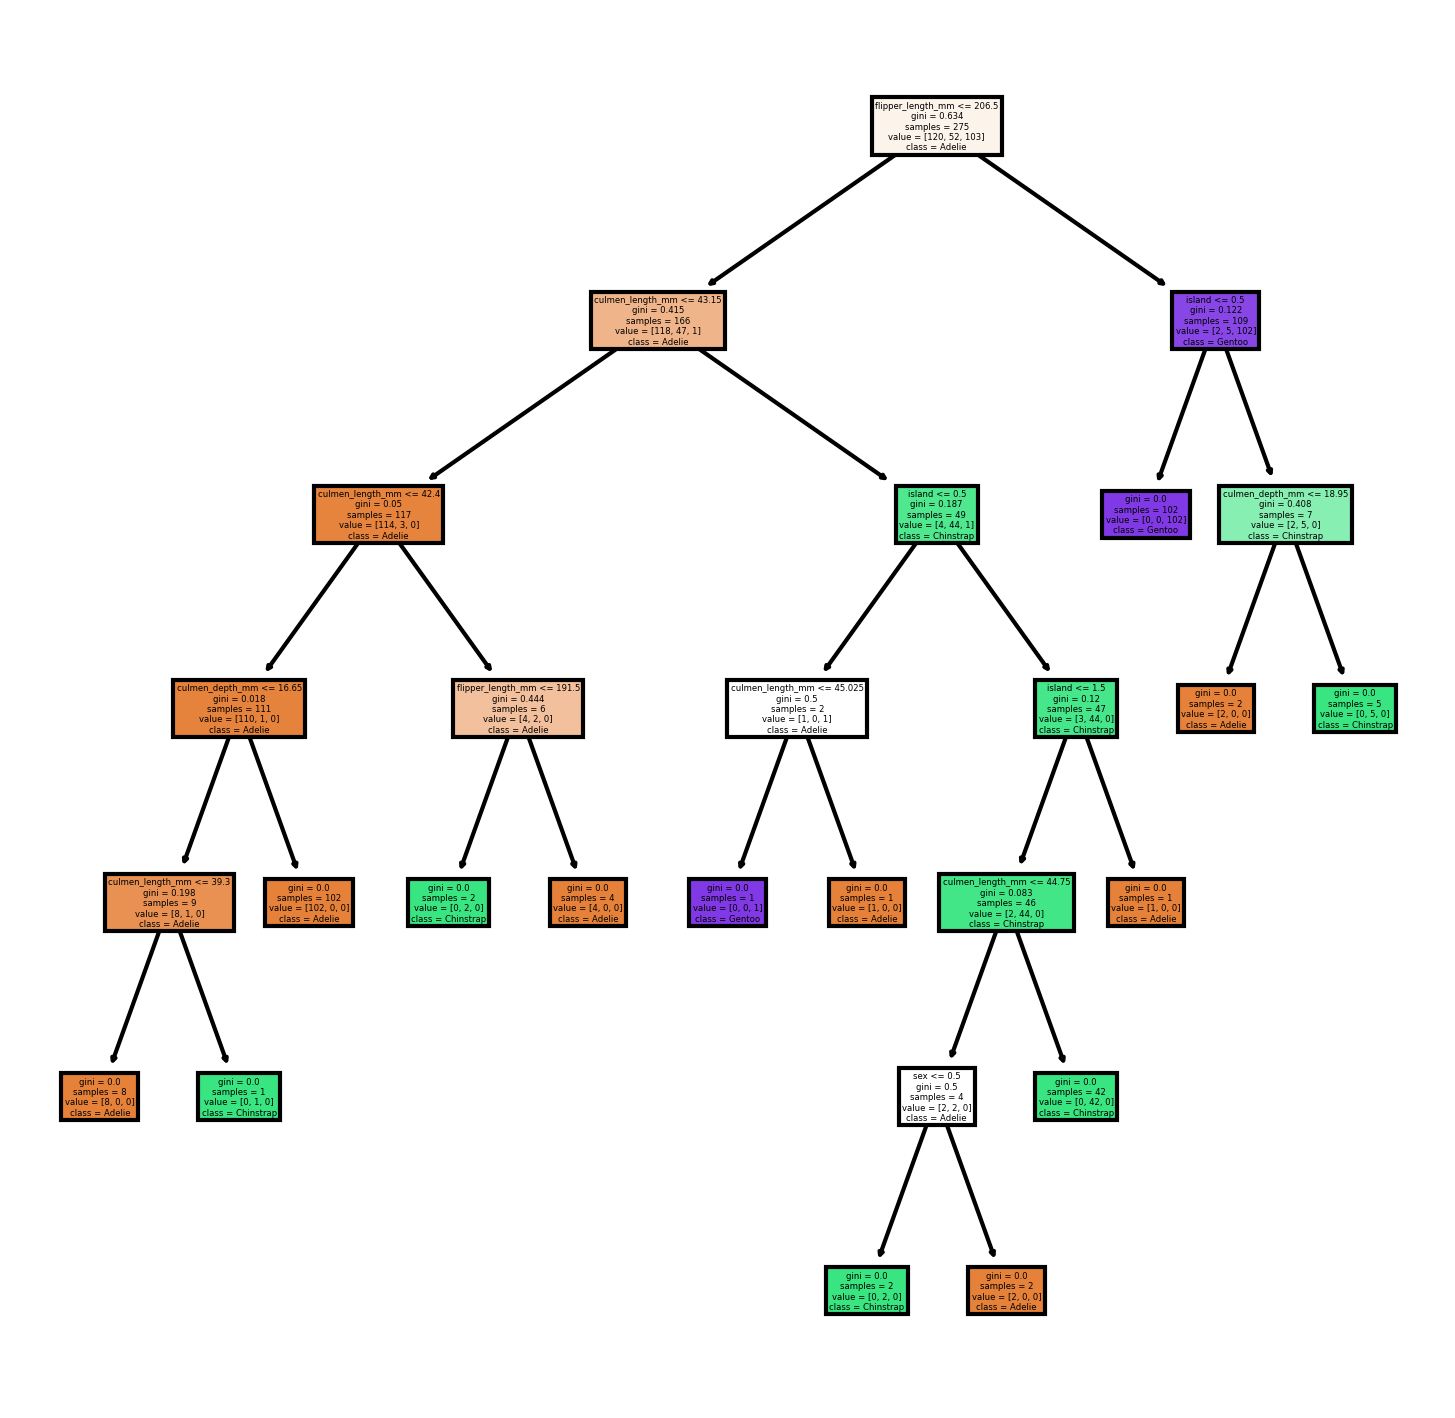

In [39]:
plt.figure(figsize=(6,6),dpi=300)

if model_DT_class==None:
    print("Model not fitted yet")

else:
    tree.plot_tree(model_DT_class, filled=True, feature_names=["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"], class_names=species);

## Visualizing the decision boundaries

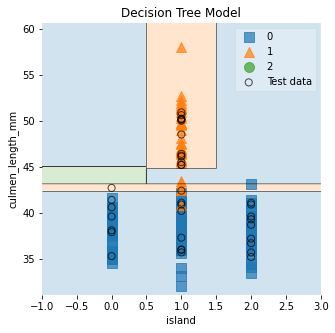

In [40]:
plt.figure(figsize=(5,5))

if model_DT_class==None:
    print("Model not fitted yet")

else:

    scatter_kwargs = {'s': 100, 'edgecolor': None, 'alpha': 0.7}
    contourf_kwargs = {'alpha': 0.2}
    scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7}
                                    
    fig = plot_decision_regions(X=train[["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]].values, y = train["species"].astype(int).values, 
                                    feature_index=[0,1], 
                                    filler_feature_values={2: 17, 3:180, 4:3000, 5:1},
                                    filler_feature_ranges={2: 10, 3:50, 4:1000, 5:3}, clf=model_DT_class,
                                    scatter_kwargs=scatter_kwargs,
                                    contourf_kwargs=contourf_kwargs,
                                    scatter_highlight_kwargs=scatter_highlight_kwargs,
                                    X_highlight=test[["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]].values)

    plt.xlabel("island")
    plt.ylabel("culmen_length_mm")
    plt.title("Decision Tree Model")
    plt.show()

## Lets tune the hyperparameters of the classifier using GridSearchCV

In [41]:
def best_params(model, param_grid, scoring, cv, X_train, Y_train):
    #Return the best hyperparameters and the fitted model
    
    params = None
    grid_model = None

    #Enter your code here
    #--------------------   

    grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring=scoring,
                          cv=cv )
                          
    grid_model.fit(X_train, Y_train)

    params = grid_model.best_params_
    #--------------------  
    return grid_model, params

In [42]:
param_grid = {"splitter":["best", "random"],
              "max_features":["log2", 2, 3, 4, 5, 6],
              "max_depth": [2, 3, 4, 5, 6],
              "min_samples_leaf": [1, 2, 3],
              "min_samples_split": [2, 3, 4, 5]}

model = DecisionTreeClassifier(random_state=42)

### Note: Discard the feature with least importance factor and use only the remaining features 

grid_model, params = best_params(model, param_grid, scoring='f1_macro', cv = 5, X_train=train[features], Y_train = train["species"])

In [43]:
print(params)

{'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [44]:
y_pred = predictions(grid_model, test[features])

In [45]:
report, conf_matrix = return_class_metrics(y_pred, test["species"])

In [46]:
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        33
         1.0       0.94      1.00      0.97        15
         2.0       1.00      1.00      1.00        21

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



In [47]:
conf_matrix

array([[32,  1,  0],
       [ 0, 15,  0],
       [ 0,  0, 21]])

<hr>

# Part 2: Random forests

<hr>

## Ensemble of decision trees for classification and regression task

### Random Forest Classifier

To predict the species of penguin

# Lets build Random Forest from Decision trees

In [48]:
def sampling_with_replacement(data, weights, num_of_samples, seed):
    #note: reset the indices of the sample dataframe when returning
    sample = None

    #Enter your code here
    #--------------------   
    sample = data.sample(num_of_samples, replace = True, weights = weights, random_state=seed)
    sample = sample.reset_index(drop=True)
    #--------------------  
    return sample

In [49]:
def sampling_without_replacement(data, weights, num_of_samples, seed):
    #note: reset the indices of the sample dataframe when returning

    sample = None
    
    #Enter your code here
    #--------------------   
    sample = data.sample(num_of_samples, replace = False, weights = weights, random_state=seed)
    sample = sample.reset_index(drop=True)
    #--------------------
    return sample

## using BaggingClassifier

In [50]:
from sklearn.ensemble import BaggingClassifier
def RF_model_bagging(X_train, y_train, **args):
    #Fit model using BaggingClassifier

    model = None

    #Enter your code here
    #----------------------------
    model = BaggingClassifier(**args)
    model.fit(X_train, y_train)
    #----------------------------
    return model

In [51]:
model = RF_model_bagging(train[features], train[target], base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state= 42 )

In [52]:
if model==None:
    print("Model is not fitted yet")
else:
    y_pred = model.predict(test[features])

In [53]:
report, conf_matrix = return_class_metrics(y_pred, test["species"])

In [54]:
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        33
         1.0       0.94      0.94      0.94        16
         2.0       0.95      1.00      0.98        20

    accuracy                           0.97        69
   macro avg       0.96      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [55]:
conf_matrix

array([[32,  1,  0],
       [ 0, 15,  1],
       [ 0,  0, 20]])

### Point to probe: Are we doing better or worse by using the ensemble when compared with just a decision tree classifier model? 

## From scratch using decision trees

In [56]:
def random_forest(sampling, dataset , num_trees=5, seed = [1,2,3,4,5], max_depth = 5):
    #return a list of fitted decision tree models
    #use random_state during sampling and fitting the models as a list of array passed as seed

    model_list = []

    #Enter your code here
    #--------------------   
    if sampling == "with_replacement":
        sampling = sampling_with_replacement
    else: 
        sampling = sampling_without_replacement

    for num in range(1,num_trees+1):        
        sample = sampling(data=dataset, weights=None, num_of_samples=len(dataset), seed=seed[num-1])
        #sample = sampling(data=dataset, weights=None, num_of_samples=len(dataset), seed=42)
        X_train = sample.iloc[:,1:7]
        y_train = sample.iloc[:,0]
        fitted_model = DecisionTreeClassifier(random_state = seed[num-1], max_depth=max_depth)
        fitted_model.fit(X_train, y_train)
        model_list.append(fitted_model)
    #-------------------- 

    return model_list

In [57]:
def make_prediction_RF(X_test, model_list):
    #return the predictions as hard vote from the fitted decision tree models
    
    prediction = []

    #Enter your code here
    #--------------------  
    from statistics import mode
    pred = [model_list[i].predict(X_test) for i in range(0,len(model_list))]
    pred = np.array(pred).T
    for i in range(0,pred.shape[0]):
        prediction.append(mode(pred[i,:]))
    #--------------------  
    return prediction

In [58]:
num_trees = 10
seed = np.arange(1,num_trees+1,1)
model_list =  random_forest(sampling="with_replacement", dataset=train, num_trees=num_trees, seed = seed, max_depth=None)
y_pred = make_prediction_RF(test[features], model_list)
report, conf_matrix = return_class_metrics(y_pred, test["species"])

In [59]:
print(report)

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        31
         1.0       1.00      0.89      0.94        18
         2.0       0.95      1.00      0.98        20

    accuracy                           0.97        69
   macro avg       0.97      0.96      0.97        69
weighted avg       0.97      0.97      0.97        69



In [60]:
conf_matrix

array([[31,  0,  0],
       [ 1, 16,  1],
       [ 0,  0, 20]])

# Random Forest using sklearn

In [61]:
def fit_random_forest_classifier(X_train, Y_train, **args):
    #Fit and return the random forest model (use sklearn)

    model = None

    #Enter your code here
    #--------------------
    model = RandomForestClassifier(**args)
    model.fit(X_train,Y_train)
    #--------------------
    return model

In [62]:
target_classification = train["species"]
model_RF_class = fit_random_forest_classifier(train[features], target_classification, random_state = 42, n_estimators=5)

In [63]:
y_pred = predictions(model_RF_class, test[features])

In [64]:
report, conf_matrix = return_class_metrics(y_pred, test["species"])

In [65]:
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        32
         1.0       1.00      1.00      1.00        16
         2.0       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [66]:
conf_matrix

array([[32,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 21]])

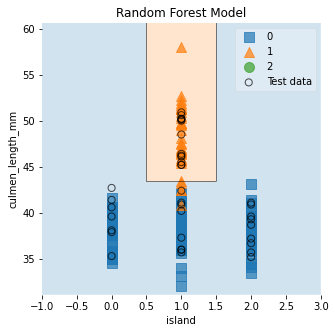

In [67]:
if model_RF_class == None:
    print("Model not fitted yet")


else:
    plt.figure(figsize=(5,5))

    scatter_kwargs = {'s': 100, 'edgecolor': None, 'alpha': 0.7}
    contourf_kwargs = {'alpha': 0.2}
    scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7}
                                    
    fig = plot_decision_regions(X=train[["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]].values, y = train["species"].astype(int).values, 
                                    feature_index=[0,1], 
                                    filler_feature_values={2: 17, 3:180, 4:3000, 5:1},
                                    filler_feature_ranges={2: 10, 3:50, 4:1000, 5:2}, clf=model_RF_class,
                                    scatter_kwargs=scatter_kwargs,
                                    contourf_kwargs=contourf_kwargs,
                                    scatter_highlight_kwargs=scatter_highlight_kwargs,
                                    X_highlight=test[["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]].values)

    plt.xlabel("island")
    plt.ylabel("culmen_length_mm")
    plt.title("Random Forest Model")
    plt.show()

## Plot ROC curve for the decision tree and random forest classsifier models

In [68]:
def plot_auc_roc(model_DT_class, model_RF_class, X_test, y_test):
    #Plot ROC for both decision tree and random forest classifier models

    #plot separately for both decision tree and random forest models, also plot all three classes

    for model in [model_DT_class, model_RF_class]:
        probs = model.predict_proba(test[["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]])
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        lw = 2

        y = label_binarize(test["species"], classes=[0, 1, 2])
        n_classes = y.shape[1]

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y[:,i], probs[:,i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        colors = cycle(["blue", "red", "green"])
        for i, color in zip(range(n_classes), colors):
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=lw,
                label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
            )

        plt.plot([0, 1], [0, 1], "k--", lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC plot: " + str(model))
        plt.legend(loc="lower right")
        plt.show()
    return

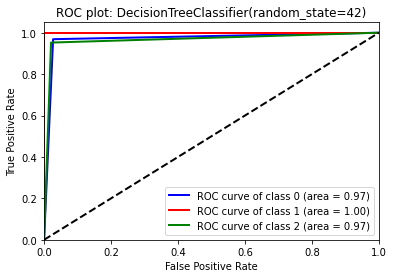

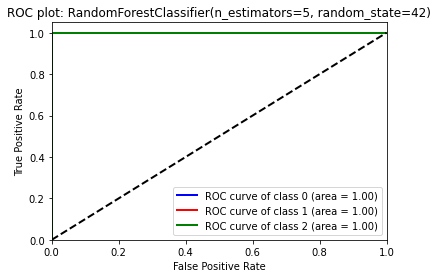

In [69]:
plot_auc_roc(model_DT_class, model_RF_class, test[features], test[target])

<hr>

# Part 3: Boosting

<hr>

# Adaboost

# From scratch using Decision trees for a binary classification problem

![AdaBoost](images/adaboost_algo.png "Algorithm")

In [70]:
#considering only two classes
try:
    dataset = penguin_data_imp_simple[(penguin_data_imp_simple['species'] == 0) | (penguin_data_imp_simple['species'] == 1)]
    dataset['species'] = dataset['species'].replace(0, -1)  #replacing class label 0 by -1
    train_binary, test_binary = train_test_split (dataset, test_size = 0.3)

except:
    print("Perform imputation and then proceed")

In [71]:
def adaboost_one_iter(dataframe, X_train, y_train, iteration_number):

    #fitting the DT model with depth one
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth=1)
    clf_gini.fit(X_train, y_train, sample_weight=dataframe['probR' + str(iteration_number)].values)  

    #tree.plot_tree(clf_gini)  
    #plt.show()

    y_pred = clf_gini.predict(X_train)

    dataframe['pred' + str(iteration_number)] = y_pred

    dataframe.loc[dataframe.species != dataframe['pred' + str(iteration_number)], 'misclassified'] = 1
    dataframe.loc[dataframe.species == dataframe['pred' + str(iteration_number)], 'misclassified'] = 0

    e = sum(dataframe['misclassified'] * dataframe['probR' + str(iteration_number)])

    try:
        alpha = 0.5*log((1-e)/e)

    except:     #if error is zero, an exception is thrown
        return dataframe, clf_gini, 1, "Terminate"

    new_weight = dataframe['probR' + str(iteration_number)]*np.exp(-1*alpha*dataframe['species']*dataframe['pred' + str(iteration_number)])
    normalized_weight = new_weight/sum(new_weight)

    dataframe['probR' + str(iteration_number + 1)] = round(normalized_weight,8)

    return dataframe, clf_gini, alpha, "Continue"

In [72]:
def ada_boost_algo(sampling="without_replacement", dataset= penguin_data, num_iter=10):

    model_list = []
    model_weight = []

    #Enter your code here
    #-------------------------
    if sampling == "with_replacement":
        sampling = sampling_with_replacement
    else: 
        sampling = sampling_without_replacement

    #Initially assign same weights to each records in the dataset
    dataset['probR1'] = 1/(dataset.shape[0])

    for num in range(1,num_iter+1):

        #print("Iteration: ", num)
        
        dataset = sampling(data=dataset, weights=dataset['probR' + str(num)], num_of_samples=len(dataset), seed=None)
        
        #X_train and Y_train split
        X_train = dataset[["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]]  
        y_train = dataset["species"]
        dataset, fitted_model, alpha, termination = adaboost_one_iter(dataset, X_train, y_train, num)
        model_list.append(fitted_model)
        model_weight.append(alpha)
        
        if termination == "Terminate":
            print("Terminated at iteration: ", num)
            break
    #-------------------------
    return model_list, model_weight

In [73]:
try:
    model_list, model_weight = ada_boost_algo(sampling="without_replacement", dataset=train_binary, num_iter=5)
except:
    print("Oops....Something went wrong")

In [74]:
def make_prediction(X_test, model_list, model_weight):
    # Make predictions using the fitted model and model weights. Use hard voting.

    #Enter your code here
    #-------------------------
    prediction = 0
    pred = [model_weight[i]*model_list[i].predict(X_test) for i in range(0,len(model_list))]
    for i in range(0,len(pred)):
        prediction += pred[i]
    #-------------------------        
    return np.sign(prediction)

In [75]:
try:
    y_pred = make_prediction(test_binary[features] , model_list, model_weight)
    print(classification_report(test_binary[target] , y_pred))
    print(confusion_matrix(test_binary[target] , y_pred))
except:
    print("Oops....Something went wrong")

              precision    recall  f1-score   support

        -1.0       0.93      0.95      0.94        44
         1.0       0.90      0.86      0.88        22

    accuracy                           0.92        66
   macro avg       0.92      0.91      0.91        66
weighted avg       0.92      0.92      0.92        66

[[42  2]
 [ 3 19]]


# Using sklearn

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
model = AdaBoostClassifier(random_state=42, algorithm="SAMME", n_estimators=5)
model.fit(train_binary[features], train_binary[target])
predictions = model.predict(test_binary[features])
report, conf_matrix = return_class_metrics(test_binary[target], predictions)
print(report)
print(conf_matrix)

              precision    recall  f1-score   support

        -1.0       0.93      0.95      0.94        44
         1.0       0.90      0.86      0.88        22

    accuracy                           0.92        66
   macro avg       0.92      0.91      0.91        66
weighted avg       0.92      0.92      0.92        66

[[42  2]
 [ 3 19]]


# Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [79]:
try:
    model = GradientBoostingRegressor(random_state=42)
    model.fit(train[["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","species","sex"]], train["body_mass_g"])
    predictions = model.predict(test[["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","species","sex"]])
    print(mean_squared_error(predictions, test["body_mass_g"]))
    print(mean_absolute_error(predictions, test["body_mass_g"]))
except:
    print("Oops...Something went wrong")

109239.40440174981
265.8571937177407


# Regularization

In [80]:
param_list = [{"learning_rate": 0.05, "subsample": 0.25, "max_depth":2}, 
            {"learning_rate": 0.05, "subsample": 0.25, "max_depth":8}, 
            {"learning_rate": 0.1, "subsample": 0.25, "max_depth":10},
            {"learning_rate": 0.5, "subsample": 0.75, "max_depth":10}]


def plot_squared_error_stagewise(param_list):
    #Plotting the stagewise loss for gradient boosting regressor model with different parameter values
    #Regularization
    for i in range(0, len(param_list)):
        model = GradientBoostingRegressor(**param_list[i])
        model.fit(train[["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","species","sex"]], train["body_mass_g"])
        loss = []
        for j, y_pred in enumerate(model.staged_predict(test[["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","species","sex"]])):
            loss.append(model.loss_(test["body_mass_g"], y_pred))

        plt.plot(loss, label = str(param_list[i]))

    plt.legend(loc="upper left")
    plt.xlabel("Boosting Iterations")
    plt.ylabel("Loss : squared error")
    plt.show()
    return

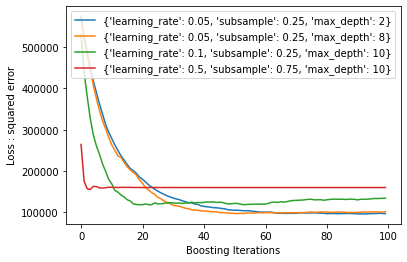

In [81]:
plot_squared_error_stagewise(param_list)

# Hyperparameter tuning using gridsearchCV

In [82]:
param_grid = {"n_estimators":[10, 30, 50, 100],
              "learning_rate":[0.01, 0.05, 0.1, 1, 1.5, 2],
              "loss":["squared_error", "absolute_error", "huber", "quantile"]}

model = GradientBoostingRegressor(random_state=42)

grid_model, params = best_params(model, param_grid, scoring='neg_mean_squared_error', cv = 10, X_train=train[["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","species","sex"]], Y_train = train["body_mass_g"])

In [83]:
print(params)

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 30}


In [84]:
predictions = grid_model.predict(test[["island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","species","sex"]])

In [85]:
print(mean_squared_error(predictions, test["body_mass_g"]))

110058.1222125392


In [86]:
print(mean_absolute_error(predictions, test["body_mass_g"]))

262.15463422274996
